In [1]:
import pandas as pd   
import numpy as np 
import seaborn as sns 
import matplotlib.pylab as plt 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)

# Cross Validation purposes 
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold,
    GridSearchCV

)

# Handling missing values 
from sklearn.impute import SimpleImputer

# SMOTE 
from imblearn.over_sampling import SMOTE

# Standarlization 
from sklearn.preprocessing import StandardScaler

# Training Model 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For pipeline to avoid data leakage 
from imblearn.pipeline import Pipeline as ImbPipeline

IMPORTING Student, GrdSystem, S_H_Survey to generate synthetic data

In [2]:
from stdInfo import Student

student = Student(600)
student_info = student.std_info_dt()
print(student_info)

                Name  Year Student Number
0     Michael Thomas     1       24427517
1    Michael Mcguire     4       21908695
2     Jonathan Smith     4       21620116
3       Jaime Phelps     2       23128726
4    Nicole Hamilton     3       22926109
..               ...   ...            ...
595       Jason Gray     4       21811928
596      Terry Baker     4       21143984
597     Taylor Glenn     3       22690757
598    Steve Bennett     3       22951969
599      Heidi Boone     2       23817287

[600 rows x 3 columns]


In [3]:
from stdGrade import GrdSystem

students = GrdSystem(600)
student_grades = students.overall_dt_stdGrades()
print(student_grades)

                Name  Year Student Number  Subject_1  Subject_2  Subject_3  \
0     Michael Thomas     1       24427517       1.50       1.50       2.75   
1    Michael Mcguire     4       21908695       5.00       1.00       2.25   
2     Jonathan Smith     4       21620116       2.75       1.00       1.00   
3       Jaime Phelps     2       23128726       5.00       1.25       1.00   
4    Nicole Hamilton     3       22926109       1.50       2.50       1.75   
..               ...   ...            ...        ...        ...        ...   
595       Jason Gray     4       21811928       1.75       1.75       2.25   
596      Terry Baker     4       21143984       2.75       5.00       2.75   
597     Taylor Glenn     3       22690757       1.50       5.00       2.25   
598    Steve Bennett     3       22951969       1.75       2.25       1.25   
599      Heidi Boone     2       23817287       2.00       2.50       2.50   

     Subject_4  Subject_5     Status  Subject_6  Subject_7  Sub

In [4]:
from StudyHbtsSurvey import S_H_Survey

survey = S_H_Survey(600, Total_respondents= 600, Respondents_ans=531)
student_survey = survey.std_info_and_survey()
print(student_survey)

                Name  Year Student Number Homework_Question_1  \
0     Michael Thomas     1       24427517               Agree   
1    Michael Mcguire     4       21908695      Strongly Agree   
2     Jonathan Smith     4       21620116      Strongly Agree   
3       Jaime Phelps     2       23128726   Strongly Disagree   
4    Nicole Hamilton     3       22926109   Strongly Disagree   
..               ...   ...            ...                 ...   
595       Jason Gray     4       21811928                 NaN   
596      Terry Baker     4       21143984                 NaN   
597     Taylor Glenn     3       22690757                 NaN   
598    Steve Bennett     3       22951969                 NaN   
599      Heidi Boone     2       23817287                 NaN   

    Homework_Question_2 Homework_Question_3 Time Allocation_Question_1  \
0                 Agree   Strongly Disagree          Strongly Disagree   
1              Disagree   Strongly Disagree          Strongly Disagree 

Merging dataframes of student_grades and student_survey, as well as understading the data

In [5]:
merged_data = pd.merge(student_grades, student_survey, how= "left", on= ["Student Number", "Name", "Year"])
merged_data

,Name,Year,Student Number,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Status,Subject_6,Subject_7,Subject_8,Final Grade,Subjects Failed,Homework_Question_1,Homework_Question_2,Homework_Question_3,Time Allocation_Question_1,Time Allocation_Question_2,Time Allocation_Question_3,Reading and Note Taking_Question_1,Reading and Note Taking_Question_2,Reading and Note Taking_Question_3,Study Period Procedures_Question_1,Study Period Procedures_Question_2,Study Period Procedures_Question_3,Written Works_Question_1,Written Works_Question_2,Written Works_Question_3,Examination_Question_1,Examination_Question_2,Examination_Question_3,Teachers Consultation_Question_1,Teachers Consultation_Question_2,Teachers Consultation_Question_3
0,Michael Thomas,1,24427517,1.50,1.50,2.75,5.00,2.75,Irregular,NaN,NaN,NaN,2.79,1,Agree,Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Disagree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Disagree,Strongly Disagree,Strongly Agree,Agree,Strongly Disagree,Agree,Agree,Agree,Agree
1,Michael Mcguire,4,21908695,5.00,1.00,2.25,3.00,5.00,Irregular,NaN,NaN,NaN,3.25,2,Strongly Agree,Disagree,Strongly Disagree,Strongly Disagree,Agree,Strongly Disagree,Disagree,Strongly Disagree,Strongly Agree,Disagree,Agree,Strongly Agree,Strongly Disagree,Disagree,Strongly Disagree,Strongly Disagree,Disagree,Strongly Agree,Disagree,Agree,Strongly Agree
2,Jonathan Smith,4,21620116,2.75,1.00,1.00,3.00,4.00,Irregular,NaN,NaN,NaN,2.35,1,Strongly Agree,Strongly Disagree,Disagree,Strongly Agree,Disagree,Disagree,Agree,Agree,Strongly Disagree,Strongly Agree,Disagree,Strongly Agree,Strongly Disagree,Strongly Disagree,Agree,Strongly Disagree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree
3,Jaime Phelps,2,23128726,5.00,1.25,1.00,1.50,2.25,Irregular,3.00,2.75,1.25,2.13,1,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Agree,Strongly Disagree,Strongly Agree,Strongly Disagree,Disagree,Agree,Strongly Disagree,Agree,Disagree,Disagree,Strongly Disagree,Disagree,Strongly Agree,Agree,Strongly Agree,Strongly Disagree
4,Nicole Hamilton,3,22926109,1.50,2.50,1.75,1.75,1.50,Regular,1.50,1.25,NaN,1.68,0,Strongly Disagree,Strongly Agree,Strongly Disagree,Disagree,Agree,Strongly Agree,Disagree,Strongly Agree,Disagree,Disagree,Disagree,Strongly Agree,Strongly Agree,Disagree,Strongly Disagree,Strongly Disagree,Strongly Agree,Strongly Agree,Disagree,Agree,Strongly Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Jason Gray,4,21811928,1.75,1.75,2.25,1.25,2.25,Regular,NaN,NaN,NaN,1.85,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
596,Terry Baker,4,21143984,2.75,5.00,2.75,1.25,1.75,Irregular,NaN,NaN,NaN,2.70,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
597,Taylor Glenn,3,22690757,1.50,5.00,2.25,1.00,3.00,Irregular,2.75,2.50,NaN,2.57,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
598,Steve Bennett,3,22951969,1.75,2.25,1.25,2.00,2.25,Irregular,4.00,3.00,NaN,2.36,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None


In [6]:
merged_data.to_csv('tbl_10_try.csv', index=False)
print('Done')

Done


In [7]:
merged_data.shape

(600, 35)

In [8]:
merged_data.dtypes

Name                                   object
Year                                    int64
Student Number                         object
Subject_1                             float64
Subject_2                             float64
Subject_3                             float64
Subject_4                             float64
Subject_5                             float64
Status                                 object
Subject_6                             float64
Subject_7                             float64
Subject_8                             float64
Final Grade                           float64
Subjects Failed                         int64
Homework_Question_1                    object
Homework_Question_2                    object
Homework_Question_3                    object
Time Allocation_Question_1             object
Time Allocation_Question_2             object
Time Allocation_Question_3             object
Reading and Note Taking_Question_1     object
Reading and Note Taking_Question_2

In [9]:
merged_data.drop_duplicates()

,Name,Year,Student Number,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Status,Subject_6,Subject_7,Subject_8,Final Grade,Subjects Failed,Homework_Question_1,Homework_Question_2,Homework_Question_3,Time Allocation_Question_1,Time Allocation_Question_2,Time Allocation_Question_3,Reading and Note Taking_Question_1,Reading and Note Taking_Question_2,Reading and Note Taking_Question_3,Study Period Procedures_Question_1,Study Period Procedures_Question_2,Study Period Procedures_Question_3,Written Works_Question_1,Written Works_Question_2,Written Works_Question_3,Examination_Question_1,Examination_Question_2,Examination_Question_3,Teachers Consultation_Question_1,Teachers Consultation_Question_2,Teachers Consultation_Question_3
0,Michael Thomas,1,24427517,1.50,1.50,2.75,5.00,2.75,Irregular,NaN,NaN,NaN,2.79,1,Agree,Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Disagree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Disagree,Strongly Disagree,Strongly Agree,Agree,Strongly Disagree,Agree,Agree,Agree,Agree
1,Michael Mcguire,4,21908695,5.00,1.00,2.25,3.00,5.00,Irregular,NaN,NaN,NaN,3.25,2,Strongly Agree,Disagree,Strongly Disagree,Strongly Disagree,Agree,Strongly Disagree,Disagree,Strongly Disagree,Strongly Agree,Disagree,Agree,Strongly Agree,Strongly Disagree,Disagree,Strongly Disagree,Strongly Disagree,Disagree,Strongly Agree,Disagree,Agree,Strongly Agree
2,Jonathan Smith,4,21620116,2.75,1.00,1.00,3.00,4.00,Irregular,NaN,NaN,NaN,2.35,1,Strongly Agree,Strongly Disagree,Disagree,Strongly Agree,Disagree,Disagree,Agree,Agree,Strongly Disagree,Strongly Agree,Disagree,Strongly Agree,Strongly Disagree,Strongly Disagree,Agree,Strongly Disagree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree
3,Jaime Phelps,2,23128726,5.00,1.25,1.00,1.50,2.25,Irregular,3.00,2.75,1.25,2.13,1,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Agree,Strongly Disagree,Strongly Agree,Strongly Disagree,Disagree,Agree,Strongly Disagree,Agree,Disagree,Disagree,Strongly Disagree,Disagree,Strongly Agree,Agree,Strongly Agree,Strongly Disagree
4,Nicole Hamilton,3,22926109,1.50,2.50,1.75,1.75,1.50,Regular,1.50,1.25,NaN,1.68,0,Strongly Disagree,Strongly Agree,Strongly Disagree,Disagree,Agree,Strongly Agree,Disagree,Strongly Agree,Disagree,Disagree,Disagree,Strongly Agree,Strongly Agree,Disagree,Strongly Disagree,Strongly Disagree,Strongly Agree,Strongly Agree,Disagree,Agree,Strongly Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Jason Gray,4,21811928,1.75,1.75,2.25,1.25,2.25,Regular,NaN,NaN,NaN,1.85,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
596,Terry Baker,4,21143984,2.75,5.00,2.75,1.25,1.75,Irregular,NaN,NaN,NaN,2.70,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
597,Taylor Glenn,3,22690757,1.50,5.00,2.25,1.00,3.00,Irregular,2.75,2.50,NaN,2.57,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
598,Steve Bennett,3,22951969,1.75,2.25,1.25,2.00,2.25,Irregular,4.00,3.00,NaN,2.36,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None


In [10]:
merged_data.describe()

,Year,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Final Grade,Subjects Failed
count,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,296.000000,296.000000,135.000000,600.000000,600.000000
mean,2.596667,2.555000,2.49250,2.472500,2.433750,2.451250,2.504223,2.492399,2.390741,2.483283,1.148333
std,1.120751,1.194247,1.12545,1.160203,1.117141,1.148972,1.168161,1.199993,1.107811,0.476055,0.959791
min,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.250000,0.000000
25%,2.000000,1.750000,1.50000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,2.150000,0.000000
50%,3.000000,2.250000,2.25000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.460000,1.000000
75%,4.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.790000,2.000000
max,4.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.360000,4.000000


In [11]:
merged_data.columns

Index(['Name', 'Year', 'Student Number', 'Subject_1', 'Subject_2', 'Subject_3',
       'Subject_4', 'Subject_5', 'Status', 'Subject_6', 'Subject_7',
       'Subject_8', 'Final Grade', 'Subjects Failed', 'Homework_Question_1',
       'Homework_Question_2', 'Homework_Question_3',
       'Time Allocation_Question_1', 'Time Allocation_Question_2',
       'Time Allocation_Question_3', 'Reading and Note Taking_Question_1',
       'Reading and Note Taking_Question_2',
       'Reading and Note Taking_Question_3',
       'Study Period Procedures_Question_1',
       'Study Period Procedures_Question_2',
       'Study Period Procedures_Question_3', 'Written Works_Question_1',
       'Written Works_Question_2', 'Written Works_Question_3',
       'Examination_Question_1', 'Examination_Question_2',
       'Examination_Question_3', 'Teachers Consultation_Question_1',
       'Teachers Consultation_Question_2', 'Teachers Consultation_Question_3'],
      dtype='object')

Picking the features needed for prediction model

In [12]:
merged_data = merged_data[[ #'Name', 
        'Year', 
        #'Student Number', 'Subject_1', 'Subject_2', 'Subject_3',
       #'Subject_4', 'Subject_5', 
       #'Subject_6', 'Subject_7','Subject_8', 
       'Final Grade', 'Subjects Failed', 'Homework_Question_1',
       'Homework_Question_2', 'Homework_Question_3',
       'Time Allocation_Question_1', 'Time Allocation_Question_2',
       'Time Allocation_Question_3', 'Reading and Note Taking_Question_1',
       'Reading and Note Taking_Question_2',
       'Reading and Note Taking_Question_3',
       'Study Period Procedures_Question_1',
       'Study Period Procedures_Question_2',
       'Study Period Procedures_Question_3', 'Written Works_Question_1',
       'Written Works_Question_2', 'Written Works_Question_3',
       'Examination_Question_1', 'Examination_Question_2',
       'Examination_Question_3', 'Teachers Consultation_Question_1',
       'Teachers Consultation_Question_2', 'Teachers Consultation_Question_3', 'Status']].copy()

In [13]:
merged_data.head()

,Year,Final Grade,Subjects Failed,Homework_Question_1,Homework_Question_2,Homework_Question_3,Time Allocation_Question_1,Time Allocation_Question_2,Time Allocation_Question_3,Reading and Note Taking_Question_1,Reading and Note Taking_Question_2,Reading and Note Taking_Question_3,Study Period Procedures_Question_1,Study Period Procedures_Question_2,Study Period Procedures_Question_3,Written Works_Question_1,Written Works_Question_2,Written Works_Question_3,Examination_Question_1,Examination_Question_2,Examination_Question_3,Teachers Consultation_Question_1,Teachers Consultation_Question_2,Teachers Consultation_Question_3,Status
0,1,2.79,1,Agree,Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Disagree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Disagree,Strongly Disagree,Strongly Agree,Agree,Strongly Disagree,Agree,Agree,Agree,Agree,Irregular
1,4,3.25,2,Strongly Agree,Disagree,Strongly Disagree,Strongly Disagree,Agree,Strongly Disagree,Disagree,Strongly Disagree,Strongly Agree,Disagree,Agree,Strongly Agree,Strongly Disagree,Disagree,Strongly Disagree,Strongly Disagree,Disagree,Strongly Agree,Disagree,Agree,Strongly Agree,Irregular
2,4,2.35,1,Strongly Agree,Strongly Disagree,Disagree,Strongly Agree,Disagree,Disagree,Agree,Agree,Strongly Disagree,Strongly Agree,Disagree,Strongly Agree,Strongly Disagree,Strongly Disagree,Agree,Strongly Disagree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Irregular
3,2,2.13,1,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Agree,Strongly Disagree,Strongly Agree,Strongly Disagree,Disagree,Agree,Strongly Disagree,Agree,Disagree,Disagree,Strongly Disagree,Disagree,Strongly Agree,Agree,Strongly Agree,Strongly Disagree,Irregular
4,3,1.68,0,Strongly Disagree,Strongly Agree,Strongly Disagree,Disagree,Agree,Strongly Agree,Disagree,Strongly Agree,Disagree,Disagree,Disagree,Strongly Agree,Strongly Agree,Disagree,Strongly Disagree,Strongly Disagree,Strongly Agree,Strongly Agree,Disagree,Agree,Strongly Agree,Regular


Renaming columns, making sure that there are no spaces and in proper capitalization

In [14]:
merged_data = merged_data.rename(columns = { 
    "Final Grade" : "Final_Grade",
    "Subjects Failed" : "Subjects_Failed",
    "Time Allocation_Question_1" : "Time_Allocation_Question_1",
    "Time Allocation_Question_2" : "Time_Allocation_Question_2",
    "Time Allocation_Question_3" : "Time_Allocation_Question_3",
    "Reading and Note Taking_Question_1" : "Reading_and_Note_Taking_Question_1",
    "Reading and Note Taking_Question_2" : "Reading_and_Note_Taking_Question_2",
    "Reading and Note Taking_Question_3" : "Reading_and_Note_Taking_Question_3",
    "Study Period Procedures_Question_1" : "Study_Period_Procedures_Question_1",
    "Study Period Procedures_Question_2" : "Study_Period_Procedures_Question_2",
    "Study Period Procedures_Question_3" : "Study_Period_Procedures_Question_3",
    "Written Works_Question_1" : "Written_Works_Question_1",
    "Written Works_Question_2" : "Written_Works_Question_2",
    "Written Works_Question_3" : "Written_Works_Question_3", 
    "Teachers Consultation_Question_1": "Teachers_Consultation_Question_1",
    "Teachers Consultation_Question_2": "Teachers_Consultation_Question_2",
    "Teachers Consultation_Question_3": "Teachers_Consultation_Question_3"
})

In [15]:
merged_data.head()

,Year,Final_Grade,Subjects_Failed,Homework_Question_1,Homework_Question_2,Homework_Question_3,Time_Allocation_Question_1,Time_Allocation_Question_2,Time_Allocation_Question_3,Reading_and_Note_Taking_Question_1,Reading_and_Note_Taking_Question_2,Reading_and_Note_Taking_Question_3,Study_Period_Procedures_Question_1,Study_Period_Procedures_Question_2,Study_Period_Procedures_Question_3,Written_Works_Question_1,Written_Works_Question_2,Written_Works_Question_3,Examination_Question_1,Examination_Question_2,Examination_Question_3,Teachers_Consultation_Question_1,Teachers_Consultation_Question_2,Teachers_Consultation_Question_3,Status
0,1,2.79,1,Agree,Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Disagree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Disagree,Strongly Disagree,Strongly Agree,Agree,Strongly Disagree,Agree,Agree,Agree,Agree,Irregular
1,4,3.25,2,Strongly Agree,Disagree,Strongly Disagree,Strongly Disagree,Agree,Strongly Disagree,Disagree,Strongly Disagree,Strongly Agree,Disagree,Agree,Strongly Agree,Strongly Disagree,Disagree,Strongly Disagree,Strongly Disagree,Disagree,Strongly Agree,Disagree,Agree,Strongly Agree,Irregular
2,4,2.35,1,Strongly Agree,Strongly Disagree,Disagree,Strongly Agree,Disagree,Disagree,Agree,Agree,Strongly Disagree,Strongly Agree,Disagree,Strongly Agree,Strongly Disagree,Strongly Disagree,Agree,Strongly Disagree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Irregular
3,2,2.13,1,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Agree,Strongly Disagree,Strongly Agree,Strongly Disagree,Disagree,Agree,Strongly Disagree,Agree,Disagree,Disagree,Strongly Disagree,Disagree,Strongly Agree,Agree,Strongly Agree,Strongly Disagree,Irregular
4,3,1.68,0,Strongly Disagree,Strongly Agree,Strongly Disagree,Disagree,Agree,Strongly Agree,Disagree,Strongly Agree,Disagree,Disagree,Disagree,Strongly Agree,Strongly Agree,Disagree,Strongly Disagree,Strongly Disagree,Strongly Agree,Strongly Agree,Disagree,Agree,Strongly Agree,Regular


Some data are in object, we need to convert it to numerical for better understading 

In [16]:
# Converting Ordinal data to Numerical Data

survey_Columns = ['Homework_Question_1',
       'Homework_Question_2', 'Homework_Question_3',
       'Time_Allocation_Question_1', 'Time_Allocation_Question_2',
       'Time_Allocation_Question_3', 'Reading_and_Note_Taking_Question_1',
       'Reading_and_Note_Taking_Question_2',
       'Reading_and_Note_Taking_Question_3',
       'Study_Period_Procedures_Question_1',
       'Study_Period_Procedures_Question_2',
       'Study_Period_Procedures_Question_3', 'Written_Works_Question_1',
       'Written_Works_Question_2', 'Written_Works_Question_3',
       'Examination_Question_1', 'Examination_Question_2',
       'Examination_Question_3', 'Teachers_Consultation_Question_1',
        'Teachers_Consultation_Question_2', 'Teachers_Consultation_Question_3']

for columns in survey_Columns:
    merged_data[columns] = merged_data[columns].map({
        'Strongly Disagree' : 1, 
        'Disagree' : 2, 
        'Agree': 3, 
        'Strongly Agree' : 4
    })

In [17]:
merged_data.head()

,Year,Final_Grade,Subjects_Failed,Homework_Question_1,Homework_Question_2,Homework_Question_3,Time_Allocation_Question_1,Time_Allocation_Question_2,Time_Allocation_Question_3,Reading_and_Note_Taking_Question_1,Reading_and_Note_Taking_Question_2,Reading_and_Note_Taking_Question_3,Study_Period_Procedures_Question_1,Study_Period_Procedures_Question_2,Study_Period_Procedures_Question_3,Written_Works_Question_1,Written_Works_Question_2,Written_Works_Question_3,Examination_Question_1,Examination_Question_2,Examination_Question_3,Teachers_Consultation_Question_1,Teachers_Consultation_Question_2,Teachers_Consultation_Question_3,Status
0,1,2.79,1,3.0,3.0,1.0,1.0,4.0,2.0,1.0,4.0,4.0,4.0,4.0,3.0,2.0,1.0,4.0,3.0,1.0,3.0,3.0,3.0,3.0,Irregular
1,4,3.25,2,4.0,2.0,1.0,1.0,3.0,1.0,2.0,1.0,4.0,2.0,3.0,4.0,1.0,2.0,1.0,1.0,2.0,4.0,2.0,3.0,4.0,Irregular
2,4,2.35,1,4.0,1.0,2.0,4.0,2.0,2.0,3.0,3.0,1.0,4.0,2.0,4.0,1.0,1.0,3.0,1.0,4.0,3.0,4.0,4.0,4.0,Irregular
3,2,2.13,1,1.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,1.0,2.0,3.0,1.0,3.0,2.0,2.0,1.0,2.0,4.0,3.0,4.0,1.0,Irregular
4,3,1.68,0,1.0,4.0,1.0,2.0,3.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,4.0,2.0,1.0,1.0,4.0,4.0,2.0,3.0,4.0,Regular


In [18]:
# Converting Ordinal data to Numerical Data

status_map = {
    "Regular": 1, 
    "Irregular": 0
}

merged_data['Status'] = merged_data['Status'].map(status_map)

In [19]:
merged_data.head()

,Year,Final_Grade,Subjects_Failed,Homework_Question_1,Homework_Question_2,Homework_Question_3,Time_Allocation_Question_1,Time_Allocation_Question_2,Time_Allocation_Question_3,Reading_and_Note_Taking_Question_1,Reading_and_Note_Taking_Question_2,Reading_and_Note_Taking_Question_3,Study_Period_Procedures_Question_1,Study_Period_Procedures_Question_2,Study_Period_Procedures_Question_3,Written_Works_Question_1,Written_Works_Question_2,Written_Works_Question_3,Examination_Question_1,Examination_Question_2,Examination_Question_3,Teachers_Consultation_Question_1,Teachers_Consultation_Question_2,Teachers_Consultation_Question_3,Status
0,1,2.79,1,3.0,3.0,1.0,1.0,4.0,2.0,1.0,4.0,4.0,4.0,4.0,3.0,2.0,1.0,4.0,3.0,1.0,3.0,3.0,3.0,3.0,0
1,4,3.25,2,4.0,2.0,1.0,1.0,3.0,1.0,2.0,1.0,4.0,2.0,3.0,4.0,1.0,2.0,1.0,1.0,2.0,4.0,2.0,3.0,4.0,0
2,4,2.35,1,4.0,1.0,2.0,4.0,2.0,2.0,3.0,3.0,1.0,4.0,2.0,4.0,1.0,1.0,3.0,1.0,4.0,3.0,4.0,4.0,4.0,0
3,2,2.13,1,1.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,1.0,2.0,3.0,1.0,3.0,2.0,2.0,1.0,2.0,4.0,3.0,4.0,1.0,0
4,3,1.68,0,1.0,4.0,1.0,2.0,3.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,4.0,2.0,1.0,1.0,4.0,4.0,2.0,3.0,4.0,1


Handling missing values by imputing

In [20]:
# Missing Values
merged_data.isnull().sum()

Year                                   0
Final_Grade                            0
Subjects_Failed                        0
Homework_Question_1                   69
Homework_Question_2                   69
Homework_Question_3                   69
Time_Allocation_Question_1            69
Time_Allocation_Question_2            69
Time_Allocation_Question_3            69
Reading_and_Note_Taking_Question_1    69
Reading_and_Note_Taking_Question_2    69
Reading_and_Note_Taking_Question_3    69
Study_Period_Procedures_Question_1    69
Study_Period_Procedures_Question_2    69
Study_Period_Procedures_Question_3    69
Written_Works_Question_1              69
Written_Works_Question_2              69
Written_Works_Question_3              69
Examination_Question_1                69
Examination_Question_2                69
Examination_Question_3                69
Teachers_Consultation_Question_1      69
Teachers_Consultation_Question_2      69
Teachers_Consultation_Question_3      69
Status          

In [21]:
# FILLING IN THE NAN VALUES 

col_to_impute = ['Homework_Question_1',
       'Homework_Question_2', 'Homework_Question_3',
       'Time_Allocation_Question_1', 'Time_Allocation_Question_2',
       'Time_Allocation_Question_3', 'Reading_and_Note_Taking_Question_1',
       'Reading_and_Note_Taking_Question_2',
       'Reading_and_Note_Taking_Question_3',
       'Study_Period_Procedures_Question_1',
       'Study_Period_Procedures_Question_2',
       'Study_Period_Procedures_Question_3', 'Written_Works_Question_1',
       'Written_Works_Question_2', 'Written_Works_Question_3',
       'Examination_Question_1', 'Examination_Question_2',
       'Examination_Question_3', 'Teachers_Consultation_Question_1',
        'Teachers_Consultation_Question_2', 'Teachers_Consultation_Question_3']

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(merged_data[col_to_impute])
merged_data[col_to_impute] = imputer.transform(merged_data[col_to_impute])

In [22]:
merged_data.isnull().sum()

Year                                  0
Final_Grade                           0
Subjects_Failed                       0
Homework_Question_1                   0
Homework_Question_2                   0
Homework_Question_3                   0
Time_Allocation_Question_1            0
Time_Allocation_Question_2            0
Time_Allocation_Question_3            0
Reading_and_Note_Taking_Question_1    0
Reading_and_Note_Taking_Question_2    0
Reading_and_Note_Taking_Question_3    0
Study_Period_Procedures_Question_1    0
Study_Period_Procedures_Question_2    0
Study_Period_Procedures_Question_3    0
Written_Works_Question_1              0
Written_Works_Question_2              0
Written_Works_Question_3              0
Examination_Question_1                0
Examination_Question_2                0
Examination_Question_3                0
Teachers_Consultation_Question_1      0
Teachers_Consultation_Question_2      0
Teachers_Consultation_Question_3      0
Status                                0


Visualize how the features relate to the target variable (Status)

c:\Users\Computer\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 65.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Computer\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 70.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Computer\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 79.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Computer\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 83.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Computer\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 43.7

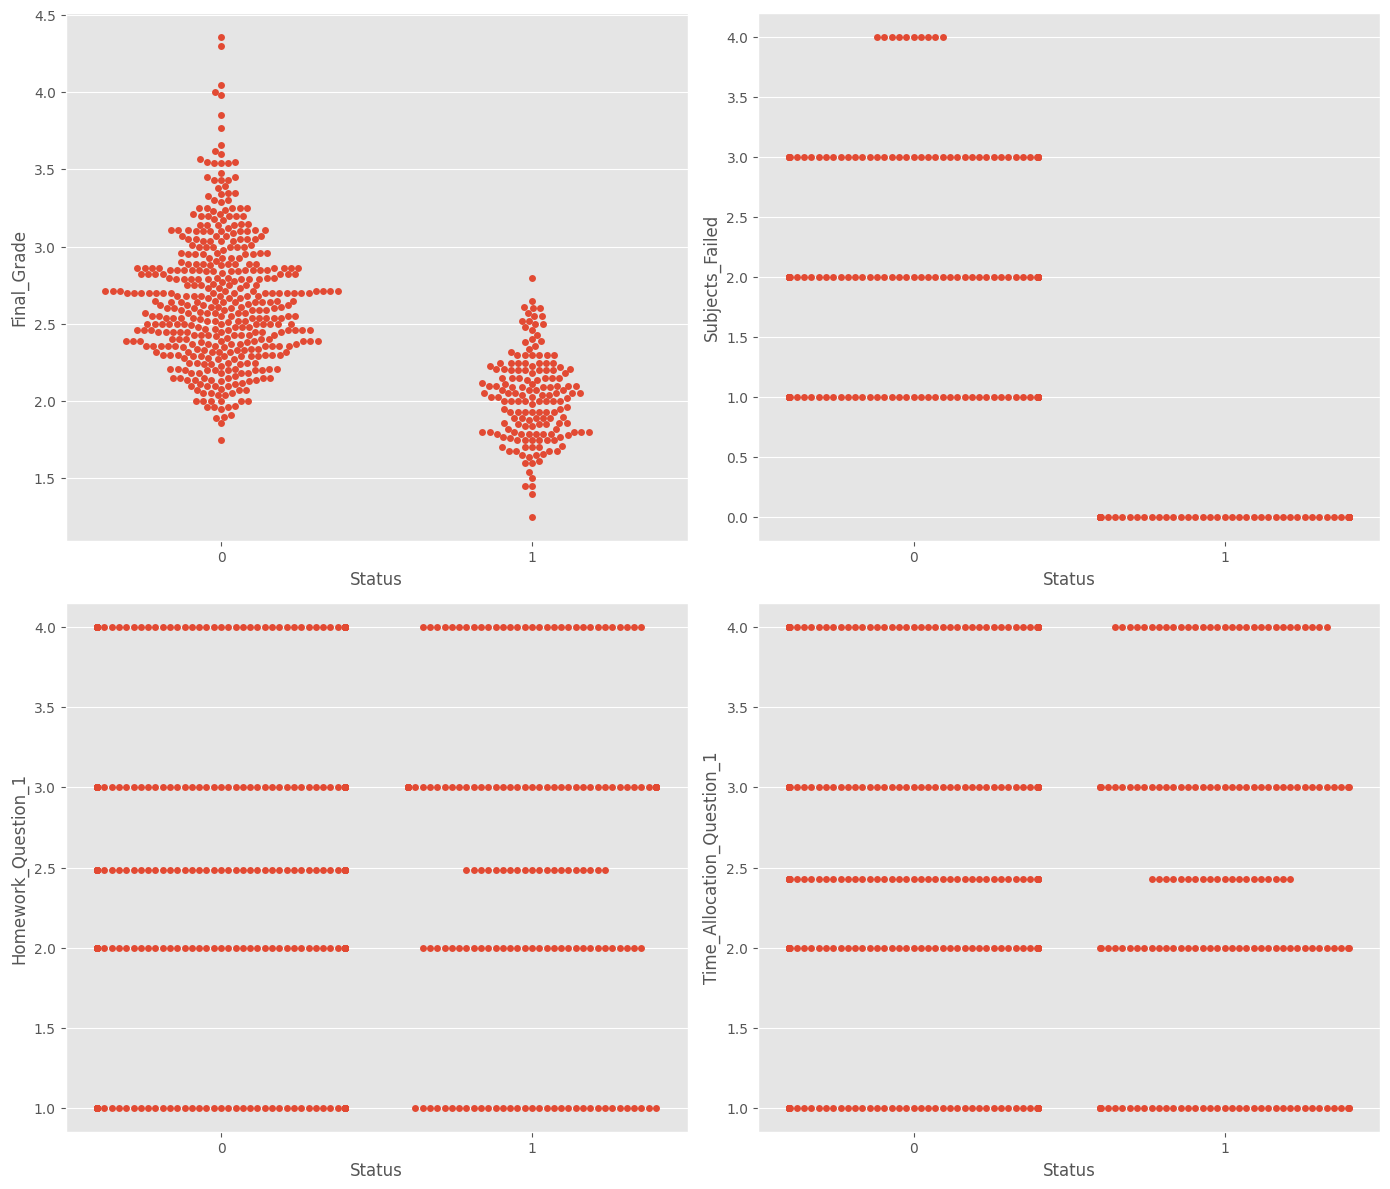

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
sns.swarmplot(ax=axes[0, 0], x='Status', y='Final_Grade', data=merged_data)
sns.swarmplot(ax=axes[0, 1], x='Status', y='Subjects_Failed', data=merged_data)
sns.swarmplot(ax=axes[1, 0], x='Status', y='Homework_Question_1', data=merged_data)
sns.swarmplot(ax=axes[1, 1], x='Status', y='Time_Allocation_Question_1', data=merged_data)

plt.tight_layout()
plt.show()

We're trying to observe if there is a need to drop outliers, as well as if there is a imbalances in the data 

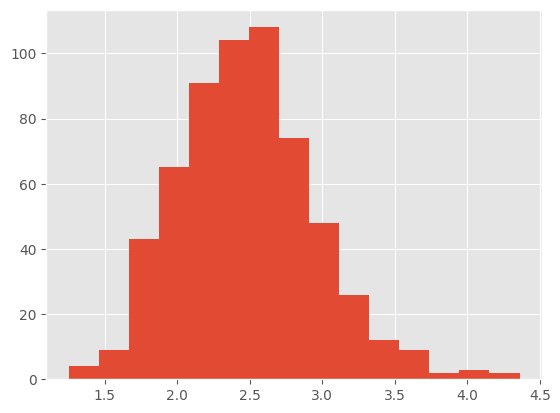

In [24]:
# Outlier 
plt.hist(merged_data['Final_Grade'], bins = 15)
plt.show()

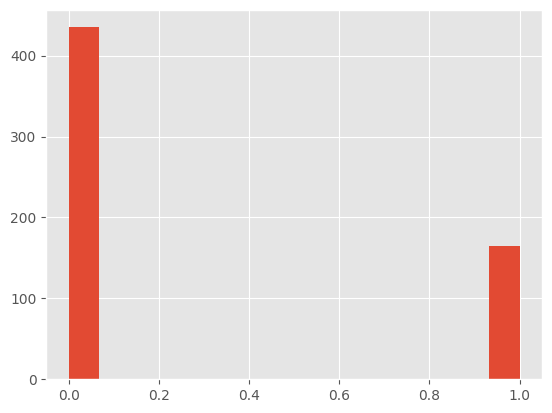

In [25]:
# This shows the data of students who are regular and irregular students 
# It shows imbalances 
plt.hist(merged_data['Status'], bins = 15)
plt.show()

In [26]:
# Quantile - identify the outlier

# Lower limit shows who are high performing students
lowerlimit = merged_data['Final_Grade'].quantile(0.05)
lowerlimit
filtered_data_lower = merged_data[merged_data['Final_Grade'] < lowerlimit]

filtered_data_lower

,Year,Final_Grade,Subjects_Failed,Homework_Question_1,Homework_Question_2,Homework_Question_3,Time_Allocation_Question_1,Time_Allocation_Question_2,Time_Allocation_Question_3,Reading_and_Note_Taking_Question_1,Reading_and_Note_Taking_Question_2,Reading_and_Note_Taking_Question_3,Study_Period_Procedures_Question_1,Study_Period_Procedures_Question_2,Study_Period_Procedures_Question_3,Written_Works_Question_1,Written_Works_Question_2,Written_Works_Question_3,Examination_Question_1,Examination_Question_2,Examination_Question_3,Teachers_Consultation_Question_1,Teachers_Consultation_Question_2,Teachers_Consultation_Question_3,Status
4,3,1.68,0,1.000000,4.000000,1.000000,2.000000,3.000000,4.00000,2.000000,4.000000,2.000000,2.00000,2.000000,4.000000,4.000000,2.000000,1.000000,1.000000,4.000000,4.000000,2.000000,3.000000,4.000000,1
33,3,1.75,0,2.000000,4.000000,4.000000,4.000000,1.000000,4.00000,2.000000,3.000000,4.000000,1.00000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,1.000000,1
37,4,1.70,0,2.000000,1.000000,4.000000,2.000000,2.000000,4.00000,3.000000,4.000000,4.000000,3.00000,1.000000,4.000000,4.000000,2.000000,1.000000,2.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1
44,3,1.68,0,3.000000,3.000000,2.000000,2.000000,2.000000,1.00000,4.000000,3.000000,3.000000,3.00000,3.000000,2.000000,3.000000,4.000000,2.000000,1.000000,3.000000,1.000000,2.000000,3.000000,1.000000,1
69,3,1.61,0,1.000000,4.000000,2.000000,3.000000,3.000000,3.00000,3.000000,1.000000,1.000000,2.00000,1.000000,2.000000,4.000000,3.000000,1.000000,2.000000,4.000000,2.000000,1.000000,4.000000,2.000000,1
76,4,1.70,0,3.000000,3.000000,2.000000,3.000000,2.000000,4.00000,4.000000,3.000000,4.000000,2.00000,2.000000,2.000000,3.000000,1.000000,4.000000,3.000000,1.000000,3.000000,1.000000,2.000000,1.000000,1
94,4,1.45,0,2.000000,4.000000,2.000000,2.000000,4.000000,4.00000,2.000000,1.000000,3.000000,2.00000,1.000000,4.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,4.000000,2.000000,1
108,4,1.25,0,4.000000,4.000000,4.000000,3.000000,1.000000,1.00000,1.000000,2.000000,3.000000,3.00000,1.000000,2.000000,3.000000,3.000000,4.000000,1.000000,3.000000,3.000000,3.000000,2.000000,3.000000,1
130,1,1.64,0,4.000000,4.000000,4.000000,3.000000,2.000000,4.00000,2.000000,4.000000,2.000000,2.00000,3.000000,1.000000,3.000000,3.000000,1.000000,4.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1
141,4,1.45,0,1.000000,2.000000,2.000000,1.000000,3.000000,4.00000,4.000000,2.000000,3.000000,2.00000,4.000000,3.000000,3.000000,1.000000,4.000000,1.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1


In [27]:
# Upper limit shows who are low performing students 

Upperlimit = merged_data['Final_Grade'].quantile(0.95)
Upperlimit
filtered_data_upper = merged_data[merged_data['Final_Grade'] > Upperlimit]

filtered_data_upper

,Year,Final_Grade,Subjects_Failed,Homework_Question_1,Homework_Question_2,Homework_Question_3,Time_Allocation_Question_1,Time_Allocation_Question_2,Time_Allocation_Question_3,Reading_and_Note_Taking_Question_1,Reading_and_Note_Taking_Question_2,Reading_and_Note_Taking_Question_3,Study_Period_Procedures_Question_1,Study_Period_Procedures_Question_2,Study_Period_Procedures_Question_3,Written_Works_Question_1,Written_Works_Question_2,Written_Works_Question_3,Examination_Question_1,Examination_Question_2,Examination_Question_3,Teachers_Consultation_Question_1,Teachers_Consultation_Question_2,Teachers_Consultation_Question_3,Status
24,2,3.38,4,1.000000,3.000000,2.000000,2.000000,4.000000,3.00000,3.000000,4.000000,3.000000,2.00000,4.000000,1.000000,4.000000,2.000000,1.000000,3.000000,1.000000,2.000000,2.000000,4.000000,2.000000,0
25,4,3.45,3,2.000000,4.000000,1.000000,1.000000,3.000000,1.00000,4.000000,4.000000,1.000000,3.00000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,0
39,1,3.98,4,4.000000,4.000000,2.000000,2.000000,1.000000,3.00000,3.000000,1.000000,1.000000,3.00000,3.000000,3.000000,1.000000,4.000000,3.000000,3.000000,2.000000,4.000000,1.000000,3.000000,2.000000,0
42,1,3.43,2,4.000000,4.000000,3.000000,3.000000,1.000000,1.00000,3.000000,3.000000,2.000000,3.00000,2.000000,4.000000,3.000000,4.000000,1.000000,2.000000,1.000000,4.000000,1.000000,4.000000,3.000000,0
55,1,3.39,3,3.000000,1.000000,2.000000,4.000000,1.000000,4.00000,2.000000,3.000000,2.000000,3.00000,3.000000,2.000000,2.000000,4.000000,1.000000,2.000000,4.000000,1.000000,4.000000,2.000000,3.000000,0
91,1,3.43,2,3.000000,4.000000,1.000000,2.000000,3.000000,2.00000,3.000000,3.000000,1.000000,1.00000,2.000000,2.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
133,1,3.54,2,3.000000,3.000000,2.000000,1.000000,4.000000,2.00000,4.000000,2.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000,4.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0
137,2,3.33,4,3.000000,2.000000,2.000000,2.000000,3.000000,2.00000,1.000000,1.000000,4.000000,3.00000,4.000000,2.000000,4.000000,2.000000,3.000000,4.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0
160,1,4.36,4,1.000000,3.000000,3.000000,1.000000,1.000000,1.00000,3.000000,3.000000,1.000000,1.00000,3.000000,1.000000,4.000000,4.000000,4.000000,1.000000,3.000000,3.000000,2.000000,2.000000,3.000000,0
162,1,3.57,3,1.000000,3.000000,3.000000,2.000000,2.000000,2.00000,4.000000,3.000000,1.000000,3.00000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,4.000000,2.000000,2.000000,4.000000,3.000000,0


In [28]:
merged_data.columns

Index(['Year', 'Final_Grade', 'Subjects_Failed', 'Homework_Question_1',
       'Homework_Question_2', 'Homework_Question_3',
       'Time_Allocation_Question_1', 'Time_Allocation_Question_2',
       'Time_Allocation_Question_3', 'Reading_and_Note_Taking_Question_1',
       'Reading_and_Note_Taking_Question_2',
       'Reading_and_Note_Taking_Question_3',
       'Study_Period_Procedures_Question_1',
       'Study_Period_Procedures_Question_2',
       'Study_Period_Procedures_Question_3', 'Written_Works_Question_1',
       'Written_Works_Question_2', 'Written_Works_Question_3',
       'Examination_Question_1', 'Examination_Question_2',
       'Examination_Question_3', 'Teachers_Consultation_Question_1',
       'Teachers_Consultation_Question_2', 'Teachers_Consultation_Question_3',
       'Status'],
      dtype='object')

In [29]:
merged_data['Homework']= merged_data[['Homework_Question_1','Homework_Question_2','Homework_Question_3']].mean(axis=1)
merged_data['Time_Allocation']= merged_data[['Time_Allocation_Question_1','Time_Allocation_Question_2','Time_Allocation_Question_3']].mean(axis=1)
merged_data['Reading_and_Note_Taking']= merged_data[['Reading_and_Note_Taking_Question_1','Reading_and_Note_Taking_Question_2','Reading_and_Note_Taking_Question_3']].mean(axis=1)
merged_data['Study_Period_Procedures']= merged_data[['Study_Period_Procedures_Question_1','Homework_Question_2','Homework_Question_3']].mean(axis=1)
merged_data['Written_Works_Question']= merged_data[['Written_Works_Question_1','Written_Works_Question_2','Written_Works_Question_3']].mean(axis=1)
merged_data['Examination_Question']= merged_data[['Examination_Question_1','Examination_Question_2','Examination_Question_3']].mean(axis=1)
merged_data['Teachers_Consultation']= merged_data[['Teachers_Consultation_Question_1','Teachers_Consultation_Question_2','Teachers_Consultation_Question_3']].mean(axis=1)


In [30]:
merged_data.columns 


Index(['Year', 'Final_Grade', 'Subjects_Failed', 'Homework_Question_1',
       'Homework_Question_2', 'Homework_Question_3',
       'Time_Allocation_Question_1', 'Time_Allocation_Question_2',
       'Time_Allocation_Question_3', 'Reading_and_Note_Taking_Question_1',
       'Reading_and_Note_Taking_Question_2',
       'Reading_and_Note_Taking_Question_3',
       'Study_Period_Procedures_Question_1',
       'Study_Period_Procedures_Question_2',
       'Study_Period_Procedures_Question_3', 'Written_Works_Question_1',
       'Written_Works_Question_2', 'Written_Works_Question_3',
       'Examination_Question_1', 'Examination_Question_2',
       'Examination_Question_3', 'Teachers_Consultation_Question_1',
       'Teachers_Consultation_Question_2', 'Teachers_Consultation_Question_3',
       'Status', 'Homework', 'Time_Allocation', 'Reading_and_Note_Taking',
       'Study_Period_Procedures', 'Written_Works_Question',
       'Examination_Question', 'Teachers_Consultation'],
      dtype='objec

In [31]:
merged_data = merged_data [['Year', 'Final_Grade', 'Subjects_Failed',
       'Homework', 'Time_Allocation', 'Reading_and_Note_Taking',
       'Study_Period_Procedures', 'Written_Works_Question',
       'Examination_Question', 'Teachers_Consultation', 'Status']]

In [32]:
merged_data

,Year,Final_Grade,Subjects_Failed,Homework,Time_Allocation,Reading_and_Note_Taking,Study_Period_Procedures,Written_Works_Question,Examination_Question,Teachers_Consultation,Status
0,1,2.79,1,2.333333,2.333333,3.000000,2.666667,2.333333,2.333333,3.000000,0
1,4,3.25,2,2.333333,1.666667,2.333333,1.666667,1.333333,2.333333,3.000000,0
2,4,2.35,1,2.333333,2.666667,2.333333,2.333333,1.666667,2.666667,4.000000,0
3,2,2.13,1,1.000000,1.666667,2.000000,1.333333,2.333333,2.333333,2.666667,0
4,3,1.68,0,2.000000,3.000000,2.666667,2.333333,2.333333,3.000000,3.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
595,4,1.85,0,2.534212,2.509730,2.510358,2.507847,2.495292,2.475204,2.562461,1
596,4,2.70,1,2.534212,2.509730,2.510358,2.507847,2.495292,2.475204,2.562461,0
597,3,2.57,1,2.534212,2.509730,2.510358,2.507847,2.495292,2.475204,2.562461,0
598,3,2.36,1,2.534212,2.509730,2.510358,2.507847,2.495292,2.475204,2.562461,0


c:\Users\Computer\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 65.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Computer\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 70.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Computer\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 79.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Computer\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 83.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Computer\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 16.3

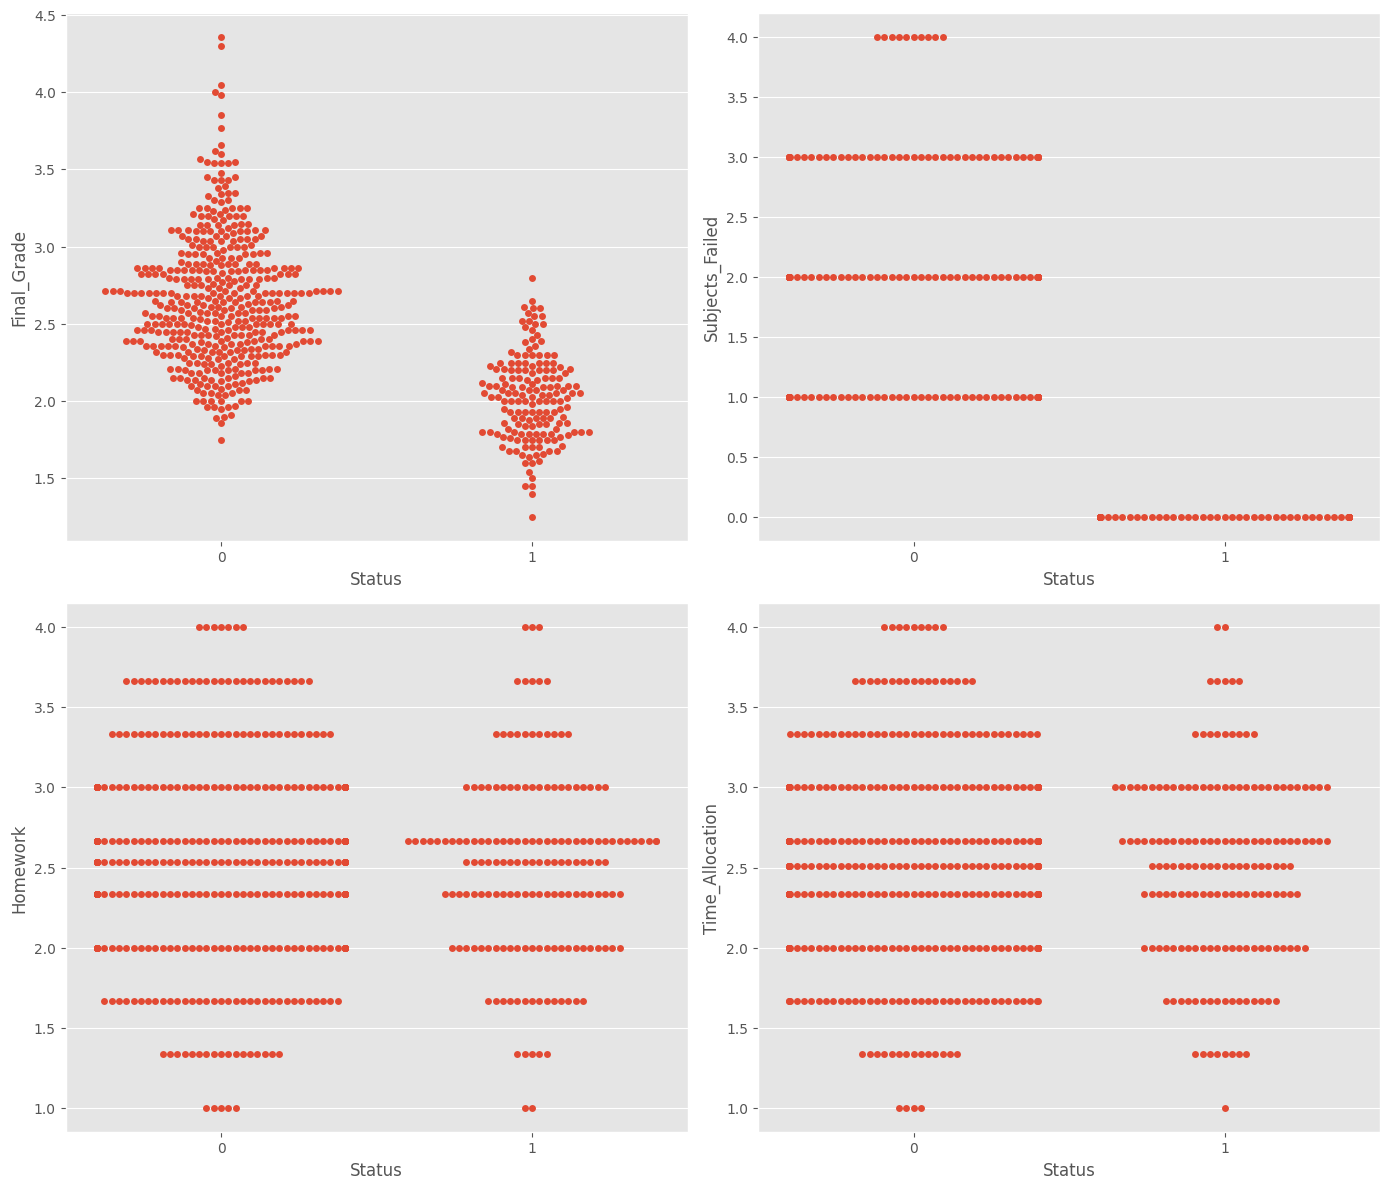

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
sns.swarmplot(ax=axes[0, 0], x='Status', y='Final_Grade', data=merged_data)
sns.swarmplot(ax=axes[0, 1], x='Status', y='Subjects_Failed', data=merged_data)
sns.swarmplot(ax=axes[1, 0], x='Status', y='Homework', data=merged_data)
sns.swarmplot(ax=axes[1, 1], x='Status', y='Time_Allocation', data=merged_data)

plt.tight_layout()
plt.show()

Independent variables are the predictor or the features that will help us predict whether the student has probability to be a irregular student for the next semester or will probably stay as regular student based on their study habits that is gathered through the survey and final grades

Dependent variable is the target variable or what we are trying to know which is the status of the student

In [34]:
# Dependent(y) and Independent(x) Variable segregation 

x = merged_data.drop(['Status'], axis=1)
y = merged_data['Status']



In [35]:
#Data Spliting (Training and Testing Set)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=25)

Interpretation

High positive correlation (close to +1): Survey questions with strong agreement are likely tied to the student’s status/final grade (e.g., good performance or passing).

High negative correlation (close to -1): Strong disagreements might be linked to poorer performance or failure.

Close to 0 correlation: This means the survey question doesn’t have a strong predictive power for the Status.

In [36]:
y_train_df = y_train.rename("Target")

# Concatenate the feature DataFrame (x_train) with the target column (y_train_df)
columnStatus_for_correlation = pd.concat([x_train, y_train_df], axis=1)

# Calculate the correlation matrix
correlation_matrix = columnStatus_for_correlation.corr()

In [37]:
correlation_matrix

,Year,Final_Grade,Subjects_Failed,Homework,Time_Allocation,Reading_and_Note_Taking,Study_Period_Procedures,Written_Works_Question,Examination_Question,Teachers_Consultation,Target
Year,1.000000,-0.077371,-0.078841,-0.013439,0.021339,0.020628,-0.009739,0.067620,0.038703,0.030577,0.053225
Final_Grade,-0.077371,1.000000,0.802728,-0.068978,-0.018219,-0.044777,-0.002986,0.005820,-0.074447,-0.002515,-0.605392
Subjects_Failed,-0.078841,0.802728,1.000000,-0.059801,-0.000331,-0.009303,0.008848,-0.025992,-0.046579,-0.000874,-0.747451
Homework,-0.013439,-0.068978,-0.059801,1.000000,-0.048675,-0.090871,0.704310,-0.031341,0.013665,-0.027075,0.003262
Time_Allocation,0.021339,-0.018219,-0.000331,-0.048675,1.000000,0.009918,0.011579,0.044388,-0.027964,-0.038467,-0.006477
Reading_and_Note_Taking,0.020628,-0.044777,-0.009303,-0.090871,0.009918,1.000000,-0.023657,-0.037126,0.052287,0.042981,0.031331
Study_Period_Procedures,-0.009739,-0.002986,0.008848,0.704310,0.011579,-0.023657,1.000000,-0.039514,0.060036,0.072229,-0.032332
Written_Works_Question,0.067620,0.005820,-0.025992,-0.031341,0.044388,-0.037126,-0.039514,1.000000,-0.076821,-0.001380,0.011637
Examination_Question,0.038703,-0.074447,-0.046579,0.013665,-0.027964,0.052287,0.060036,-0.076821,1.000000,0.018306,-0.031989
Teachers_Consultation,0.030577,-0.002515,-0.000874,-0.027075,-0.038467,0.042981,0.072229,-0.001380,0.018306,1.000000,-0.015435


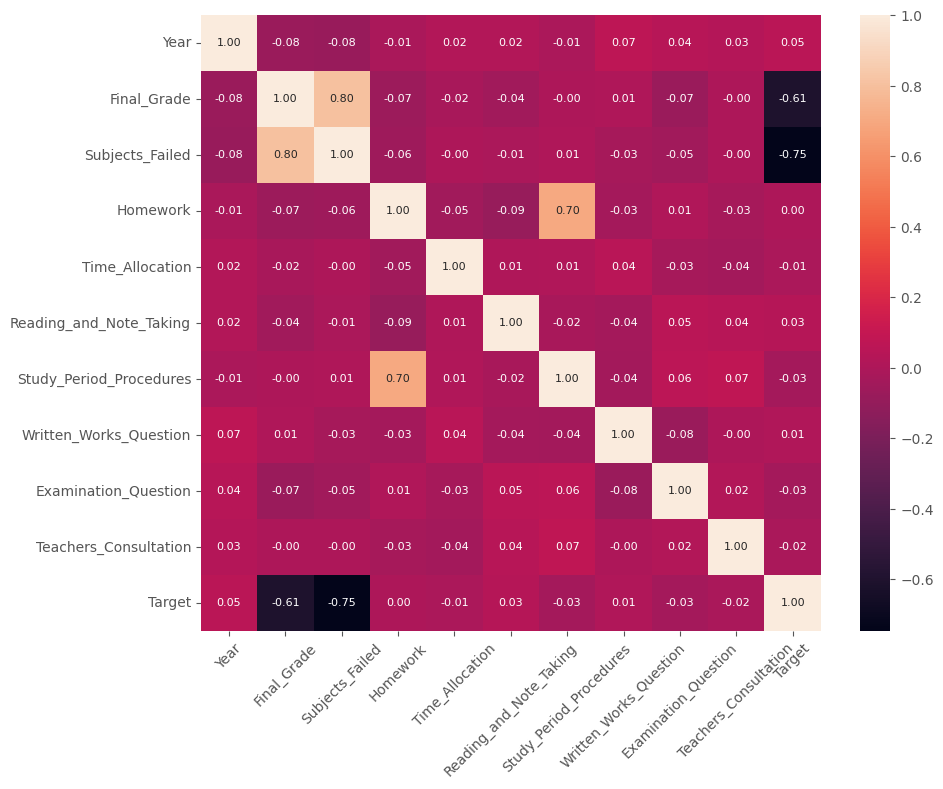

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', annot_kws={"size": 8})
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.yticks(rotation=0)   # Rotate y-axis labels
plt.show()

Matrix shows a weak relationship between the some features and the target variable 

TRAINING SVM MODEL

Identifying right hyperparameter 

In [39]:
param_grid_svm = {'C': [0.1, 1, 10, 100],
                'gamma': [1, 0.1, 0.01, 0.001],
                    }  # It penalizes misclassifications of the minority class more heavily.

svc = SVC(kernel='rbf')

grid = GridSearchCV(svc, param_grid_svm, refit=True, verbose=2, cv=5)
grid.fit(x_train, y_train)

print(grid.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

Creating pipeline to avoid data leakage wherein: 

Standardization, Smote, Model (SVM) are being performed 

In [96]:
from imblearn.over_sampling import BorderlineSMOTE, ADASYN

smote = BorderlineSMOTE(random_state=25)

svm_model = SVC(C= 0.1, gamma= 0.1, kernel='rbf', class_weight= {0: 1.5, 1: 4})

pipeline_svm = ImbPipeline(steps = [('scaler', StandardScaler()),
                                ('smote', smote),
                                ('classifier', svm_model)])

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=25)

cv_scores = cross_val_score(pipeline_svm, x_train, y_train, cv=kf, scoring='f1')

print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', np.mean(cv_scores))
print('Standard deviation of cross-validation score:', np.std(cv_scores))

Cross-validation scores: [0.98113208 0.94545455 0.98113208 0.9122807  0.92592593]
Mean cross-validation score: 0.9491850648156508
Standard deviation of cross-validation score: 0.028135597769615446


In [97]:
# Fit the pipeline on the entire training set
pipeline_svm.fit(x_train, y_train)

# Predict on the test set
y_pred_svm = pipeline_svm.predict(x_test)

# Evaluate the model on the test set
from sklearn.metrics import accuracy_score, classification_report
test_accuracy = accuracy_score(y_test, y_pred_svm)
print('Test Accuracy:', test_accuracy)

# Print classification report for detailed metrics
print('Classification Report on Test Set:')
print(classification_report(y_test, y_pred_svm))


Test Accuracy: 0.9866666666666667
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       114
           1       0.95      1.00      0.97        36

    accuracy                           0.99       150
   macro avg       0.97      0.99      0.98       150
weighted avg       0.99      0.99      0.99       150



In [42]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


TRAINING DECISION TREE 

In [43]:
# Feature Selection 

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

sel_l1 = SelectFromModel(LogisticRegression(penalty='l1', C=0.1, solver='liblinear'))

sel_l1.fit(x_train, y_train)

x_train_1 = sel_l1.transform(x_train)
x_test_1 = sel_l1.transform(x_test)

In [44]:
# Convert everything to array

x_train_1 = np.asarray(x_train_1)
x_test_1 = np.asarray(x_test_1)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

Identifying the optimal parameters for Decision Tree Model 

In [45]:
param_grid_dtc = {
    'criterion': ['gini','entropy', 'log_loss'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

dtc = DecisionTreeClassifier()

grid = GridSearchCV(dtc, param_grid_dtc, refit=True, verbose=2, cv=10)
grid.fit(x_train_1, y_train)

print(grid.best_params_)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s

Creating pipeline to avoid data leakage 

Same process with the svm model 

In [170]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
# from xgboost import XGBClassifier

# lda = LinearDiscriminantAnalysis(n_components=1)  # Adjust n_components if necessary
# x_train_lda = lda.fit_transform(x_train, y_train)
# x_test_lda = lda.transform(x_test)

pca = PCA(n_components=0.9) 

N = x_train_1.shape[0]  # Total number of records in the training data

# Calculate the range for min_samples_leaf
min_leaf_size = int(np.ceil(N * 0.0025))  # 0.25% of the training set
max_leaf_size = int(np.ceil(N * 0.01))    # 1% of the training set

# Example: Set min_samples_leaf to the midpoint of the calculated range
leaf_size = (min_leaf_size + max_leaf_size) // 2

dtc_model = DecisionTreeClassifier(min_samples_leaf=leaf_size, max_depth=5, max_features=None, class_weight= {0: 0.5, 1: 1.5})

pipeline_rf = ImbPipeline(steps = [('scaler', StandardScaler()),
                                   ('pca', pca),
                                    ('smote', SMOTE(random_state=25)),
                                    ('classifier', dtc_model)])

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=25)

cv_scores = cross_val_score(pipeline_rf, x_train, y_train, cv=kf, scoring='f1_weighted')


print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', np.mean(cv_scores))
print('Standard deviation of cross-validation score:', np.std(cv_scores))


Cross-validation scores: [0.91285202 0.88752137 0.74222222 0.9340388  0.91285202 0.91407407
 0.97801293 0.9340388  0.8513911  0.91314103]
Mean cross-validation score: 0.8980144373519681
Standard deviation of cross-validation score: 0.060396486983848134


In [183]:
# Fit the pipeline on the entire training set
pipeline_rf.fit(x_train, y_train)

# Predict on the test set
y_pred_rf= pipeline_rf.predict(x_test)

# Evaluate the model on the test set
from sklearn.metrics import accuracy_score, classification_report
test_accuracy = accuracy_score(y_test, y_pred_rf)
print('Test Accuracy:', test_accuracy)

# Print classification report for detailed metrics
print('Classification Report on Test Set:')
print(classification_report(y_test, y_pred_rf))


Test Accuracy: 0.88
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       114
           1       0.68      0.94      0.79        36

    accuracy                           0.88       150
   macro avg       0.83      0.90      0.85       150
weighted avg       0.91      0.88      0.89       150



In [48]:

# plt.scatter(x_train_lda[:, 0], x_train_lda[:, 1], c=y_train)
# plt.title("LDA Components")
# plt.show()